<center>
  <h1 style="background-color:#1E3A8A; color:#FFD700; padding:12px; border-radius:10px; font-family:Trebuchet MS;">
    ECOMMERCE ANALYSIS
  </h1>
</center>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from dotenv import load_dotenv
import os

#Load enivronment variables
load_dotenv("data.env")

# Connecting to the MySQL using env variables
db = mysql.connector.connect(
    host = os.getenv("db_host"),
    username = os.getenv("db_user"),
    password = os.getenv("db_password"),
    database = os.getenv("db_database")
)

cur = db.cursor(buffered=True)

print("✅ Database connected successfully!")

python-dotenv could not parse statement starting at line 1


✅ Database connected successfully!


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    List all unique cities where customers are located
  </h3>
</div>
</center>

In [5]:
query = """ select 
distinct customer_city 
from customers 
limit 10 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State"])
df

,State
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    The number of orders placed in 2017
  </h3>
</div>
</center>

In [10]:
query1 = """ select count(order_id)
from orders
where year(order_purchase_timestamp) = 2017 """


data1 = cur.fetchall()
cur.execute(query1)


"Total orders placed in 2017 are", data1[0][0]

('Total orders placed in 2017 are', 45101)

<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Total sales per category
  </h3>
</div>
</center>

In [7]:
query2 = """ select p.product_category as Category, round(sum(ps.payment_value),2) as Sales
from products as p
join order_items as ot on p.product_id = ot.product_id
join payments as ps on ot.order_id = ps.order_id
group by category
"""

cur.execute(query2)
data2=  cur.fetchall()



df = pd.DataFrame(data2, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Percentage of orders that were paid in installments
  </h3>
</div>
</center>

In [46]:
query = """ select round(sum(case 
when payment_installments > 1 then 1 else 0
end)/count(*)*100,2)
from payments """

cur.execute(query)
data = cur.fetchall()

"The percenatge of orders that were paid in installments is", data

('The percenatge of orders that were paid in installments is',
 [(Decimal('49.42'),)])

<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Number of customers from each state
  </h3>
</div>

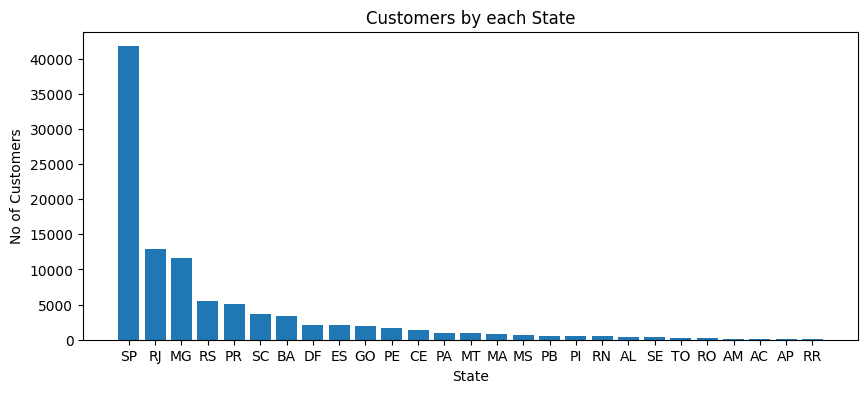

In [69]:
query = """ select customer_state, count(customer_id) as No_of_customers
from customers
group by customer_state
order by No_of_customers desc """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State", "No_of_Customers"])

plt.figure(figsize=(10,4))
plt.bar(df["State"], df["No_of_Customers"])
plt.xlabel("State")
plt.ylabel("No of Customers")
plt.title("Customers by each State")
plt.show()

<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Number of orders per month in 2018
  </h3>
</div>
</center>

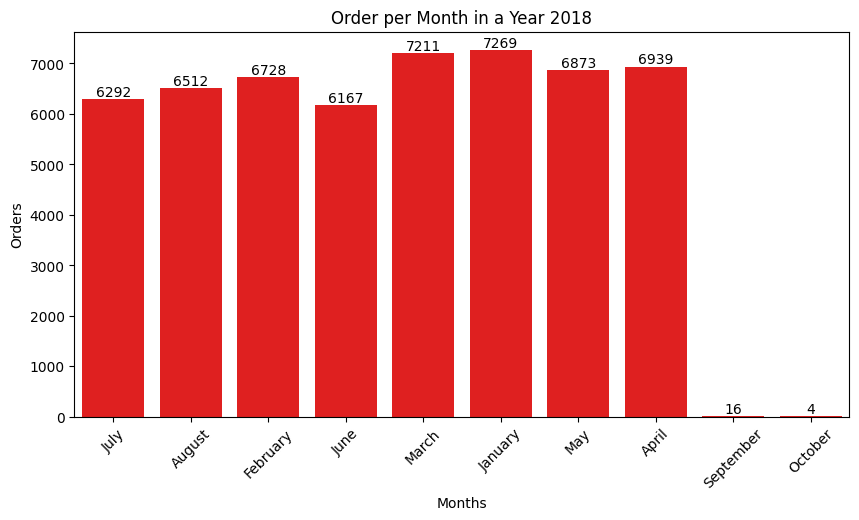

In [109]:
query = """ Select monthname(order_purchase_timestamp) as months, count(order_id) as No_of_orders
from orders
where year(order_purchase_timestamp) = 2018
group by months """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Months", "No_of_orders"])

plt.figure(figsize = (10,5))
ax = sns.barplot(x = df["Months"], y = df["No_of_orders"], data = df, color = "red")
plt.xticks(rotation = 45)
plt.title("Order per Month in a Year 2018")
plt.xlabel("Months")
plt.ylabel("Orders")
ax.bar_label(ax.containers[0])
plt.show()

<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Average number of products per order, grouped by customer city
  </h3>
</div>
</center>


In [12]:
query = """ with count_per_order as (
select
o.order_id, o.customer_id, count(ot.order_id) as Count_of_orders
from orders o
join order_items ot on o.order_id = ot.order_id
group by o.order_id, o.customer_id
)
select 
c.customer_city, round(avg(co.Count_of_orders),2) as average_orders
from customers c
join count_per_order co on c.customer_id = co.customer_id
group by c.customer_city
order by average_orders desc """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City", "Average Products"])
df.head(10)

,Customer City,Average Products
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Percentage of total renvenue contributed by each product category
  </h3>
</div>
</center>

In [22]:
query = """ select
upper(p.product_category) as category, 
round((sum(pt.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products p
join order_items ot on p.product_id = ot.product_id
join payments pt on ot.order_id = pt.order_id
group by category
order by sales_percentage desc """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Percentage"])
df.head(10)

,Category,Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Identify the correlation between product price and the number of times a product has been purchased
  </h3>
</div>
</center>

In [9]:
query = """ select
pro.product_category, count(items.product_id) as Order_Count,
round(avg(items.price),2)
from products pro
join order_items items on pro.product_id = items.product_id
group by pro.product_category """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Order_Count", "Price"])

arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is", a[0][-1])

the correlation between price and number of times a product has been purchased is -0.10631514167157562


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Total revenue generated by each seller, and rank them by revenue
  </h3>
</div>
</center>

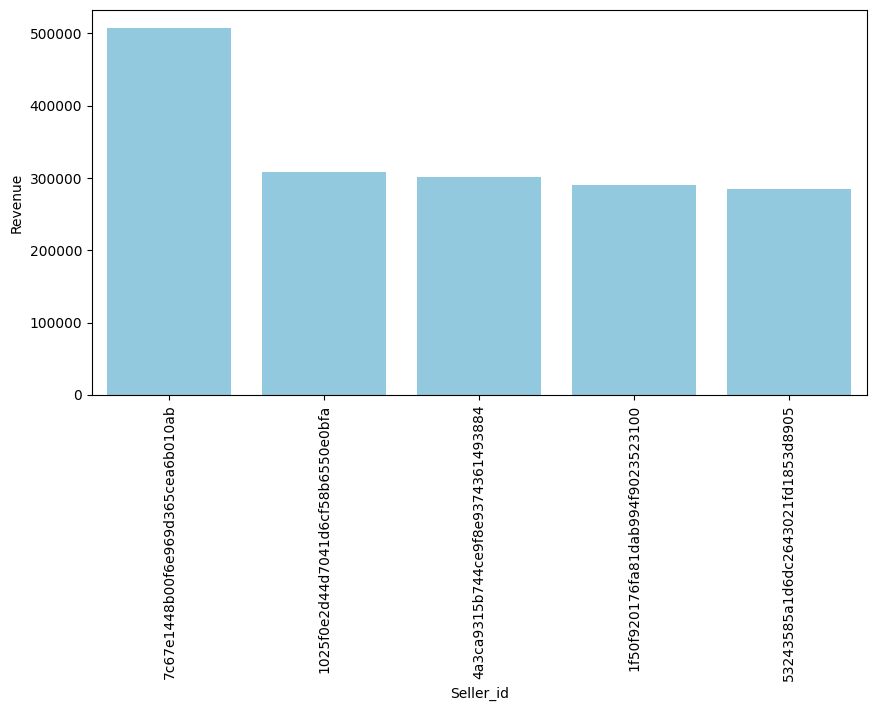

In [4]:
query = """ select *, dense_rank() over (order by revenue desc) as rn 
from 
(select
items.seller_id, round(sum(payments.payment_value),2) as revenue
from order_items items
join payments on items.order_id = payments.order_id
group by items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller_id", "Revenue", "Rank"])
df = df.head()

plt.figure(figsize=(10,5))
sns.barplot(x = "Seller_id", y = "Revenue", data = df, color = "skyblue")
plt.xticks(rotation = 90)
plt.show()

<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Moving average of order values for each customer over their order history
  </h3>
</div>
</center>

In [19]:
query = """  select customer_id, order_purchase_timestamp, payment, 
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments
join orders on payments.order_id = orders.order_id) as b """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_id", "Order_Date", "Payment", "Moving_Average"])
df

,Customer_id,Order_Date,Payment,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Cumulative sales per month for each year
  </h3>
</div>
</center>

In [17]:
query = """with a as (
select
year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders
join payments on orders.order_id = payments.order_id
group by years, months
order by years, months
)

select years, months, payment,
round(sum(payment) over (order by years, months),2) as cumulative_sales
from a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Months", "Payments", "Cumulative_Sales"])
df.head(10)

,Years,Months,Payments,Cumulative_Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Year over year growth rate of total sales
  </h3>
</div>
</center>

In [26]:
query = """ with a as (
select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value)) as payment
from orders
join payments on orders.order_id = payments.order_id
group by years
order by years
)

select
years,
((payment - lag(payment, 1) over (order by years))/lag(payment, 1) over (order by years)) * 100 
from a """

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["Years", "yoy growth % "])
df

,Years,yoy growth %
0,2016,NaN
1,2017,12112.774165
2,2018,20.000919


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase
  </h3>
</div>
</center>

In [30]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

print("There is no retention rate of customers within 6 months",data)

There is no retention rate of customers within 6 months [(None,)]


<center>
<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <h3 style="color:white; background-color:darkblue; padding:10px; border-radius:8px;">
    Top 3 customers who spent the most money in each year
  </h3>
</div>
</center>

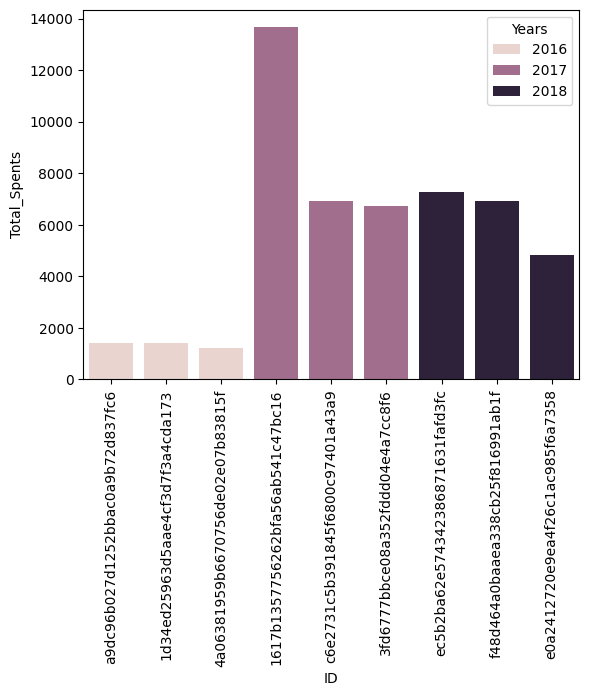

In [7]:
query = """ with a as (
select
orders.customer_id, year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value),2) as Total_Spent,
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as ranks
from orders
join payments on  orders.order_id = payments.order_id
group by orders.customer_id, year(orders.order_purchase_timestamp)
)
select
a.customer_id, a.years, a.Total_Spent, a.ranks
from a
where ranks <=3
order by a.years, a.ranks; """

cur.execute(query)
data = cur.fetchall()
data

df = pd.DataFrame(data, columns = ["ID", "Years", "Total_Spents", "Ranks"])

sns.barplot(x = "ID", y = "Total_Spents", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.show()